In [96]:
 # Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [97]:
# Study data files # Read the mouse data
mouses_data = pd.read_csv('Resources/Homework 5 Matplotlib_Pymaceuticals_data_Mouse_metadata.csv')
study_data = pd.read_csv('Resources/Homework 5 Matplotlib_Pymaceuticals_data_Study_results.csv')
mouses_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [98]:
# Read the study results
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [99]:
# Combine the data into a single dataset # Display the data table for preview
complete_data = pd.merge(study_data, mouses_data, on ='Mouse ID', how = 'left')
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [100]:
 # Checking the number of mice.
unique_mice = complete_data['Mouse ID'].unique()
unique_mice

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [101]:
# Checking the number of mice.
    
# Check count of lines per mouse
#unique_mice = complete_data['Mouse ID'].value_counts()
#unique_mice

#List of unique mice
#unique_mice = complete_data['Mouse ID'].unique()
#unique_mice

unique_mice = complete_data['Mouse ID'].nunique()
unique_mice

249

In [102]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = complete_data.loc[complete_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [103]:
# Optional: Get all the data for the duplicate mouse ID. 

In [104]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
unique_df = complete_data[complete_data['Mouse ID'].isin(duplicated_mice)==False]
unique_df2=unique_df["Mouse ID"].nunique()
unique_df2

248

In [105]:
summaryvol_df = unique_df['Tumor Volume (mm3)'].describe()
summaryvol_df

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

vol_mean = round(unique_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'],3)
vol_mean
vol_med = round(unique_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)'],3)
vol_med
vol_var = round(unique_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],3)
vol_var
vol_std = round(unique_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'],3)
vol_std
vol_sem = round(unique_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'],3)
vol_sem

summtable = pd.DataFrame({'Mean':vol_mean, 'Median':vol_med, 'Variance':vol_var, 'Standard Deviation':vol_std, 'SEM':vol_sem})
summtable

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summtable = round(unique_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)'],3)
summtable

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


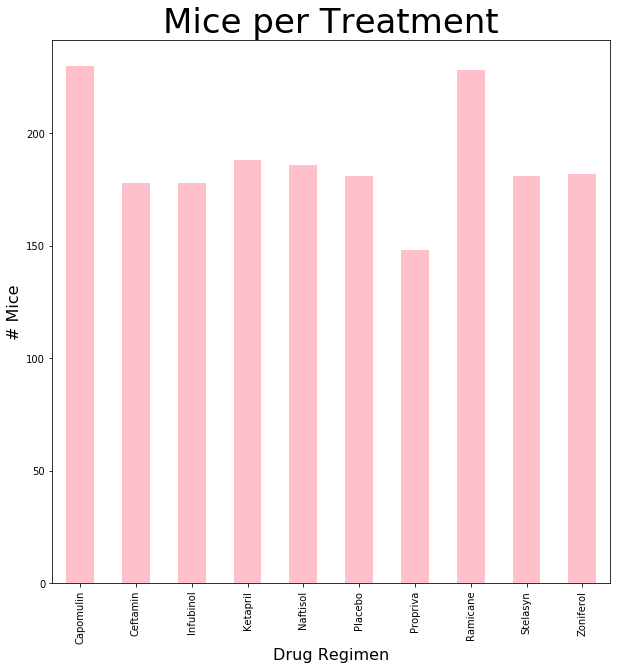

In [108]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment = unique_df.groupby(['Drug Regimen']).count()['Mouse ID'].plot.bar(figsize=(10,10), color='pink')
treatment

plt.title("Mice per Treatment",fontsize = 34)
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("# Mice",fontsize = 16)
plt.show()

Text(0, 0.5, '# Mice')

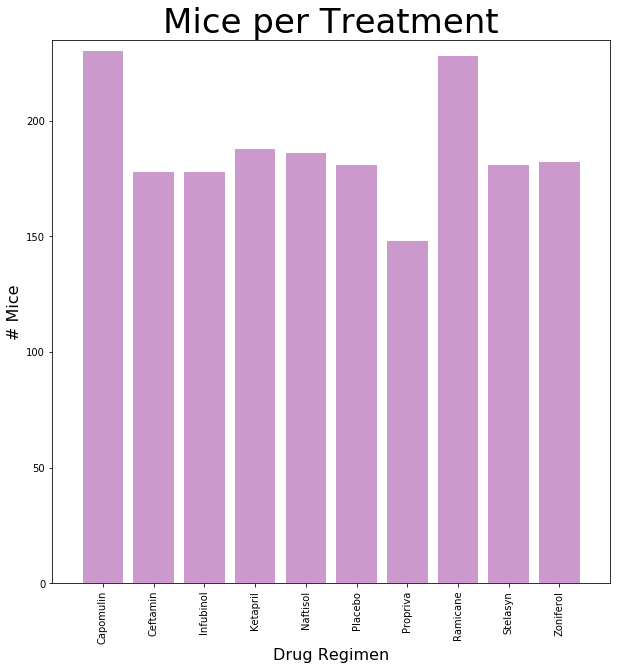

In [109]:
x_axis = np.arange(unique_df['Drug Regimen'].nunique())
y_axis = (unique_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.bar(x_axis, y_axis, color='purple', alpha=0.4, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+5)

plt.title('Mice per Treatment',fontsize = 34)
plt.xlabel('Drug Regimen',fontsize = 16)
plt.ylabel('# Mice',fontsize = 16)

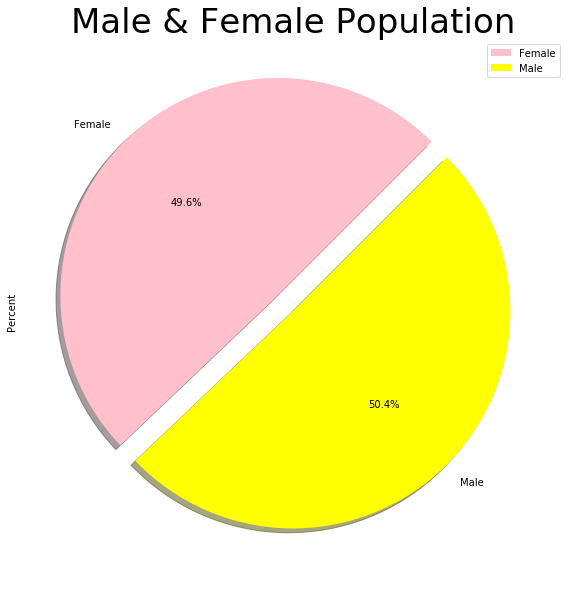

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(unique_df.groupby(['Mouse ID','Sex']).size())
gender_df2 = pd.DataFrame(gender_df.groupby(['Sex']).count())
gender_df2.columns = ['Percent']
gender_df2['Percent'] = (gender_df2['Percent']/gender_df2['Percent'].sum())*100
#gender_df2

explode = (0.1, 0)
colors = ['pink', 'yellow']
plot = gender_df2.plot.pie(y='Percent',figsize=(15,10), colors = colors, startangle=45, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title('Male & Female Population',fontsize = 34)
plt.show()

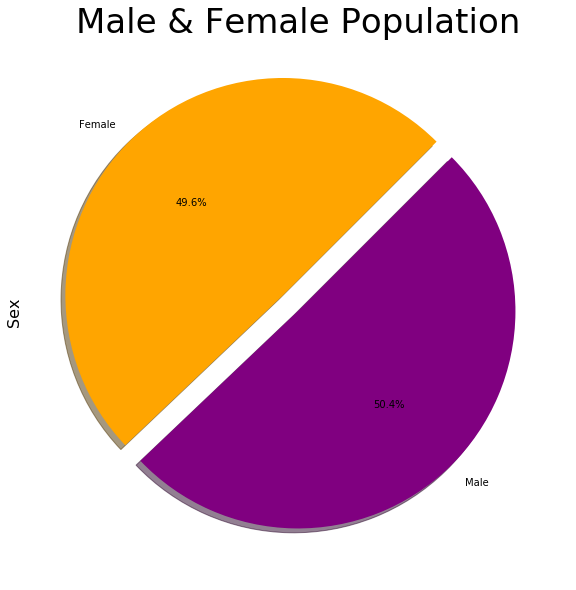

In [118]:
explode = (0.1, 0)
colors = ['orange', 'purple']

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(gender_df2['Percent'], explode=explode, labels =['Female', 'Male'], colors=colors, autopct="%1.1f%%", shadow=True, startangle=45,)
plt.title('Male & Female Population',fontsize = 34)
plt.ylabel('Sex',fontsize = 16)
plt.show()

In [ ]:
 # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint